# The following uses tensorflow to try and beat XGBoost R^2 score and tensorflow fails to do it

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits


2024-07-24 00:00:19.421529: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-24 00:00:19.421558: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-24 00:00:19.421564: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-24 00:00:19.421582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 00:00:19.421593: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-24 00:00:19.423133: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-24 00:00:19.423157: I metal_plugin/src/device/metal_device.cc:2

[CV] END batch_size=32, epochs=50, model__activation=relu, model__dropout_rate=0.0, model__optimizer=adam; total time=  50.6s
[CV] END batch_size=32, epochs=50, model__activation=relu, model__dropout_rate=0.5, model__optimizer=adam; total time=  50.3s
[CV] END batch_size=32, epochs=50, model__activation=tanh, model__dropout_rate=0.2, model__optimizer=rmsprop; total time=  37.1s
[CV] END batch_size=32, epochs=50, model__activation=tanh, model__dropout_rate=0.5, model__optimizer=rmsprop; total time=  36.4s
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.2, model__optimizer=rmsprop; total time= 1.2min
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.5, model__optimizer=rmsprop; total time= 1.2min
[CV] END batch_size=32, epochs=100, model__activation=tanh, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 1.1min
[CV] END batch_size=32, epochs=100, model__activation=tanh, model__dropout_rate=0.5, model__optimize

/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
2024-07-24 00:08:35.454086: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-24 00:08:35.454148: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-24 00:08:35.454159: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-24 00:08:35.454215: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 00:08:35.454242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 

Best Parameters: {'batch_size': 32, 'epochs': 100, 'model__activation': 'relu', 'model__dropout_rate': 0.0, 'model__optimizer': 'rmsprop'}
Model Mean Squared Error: 466527253.000536
Model R-squared: 0.9215879440307617


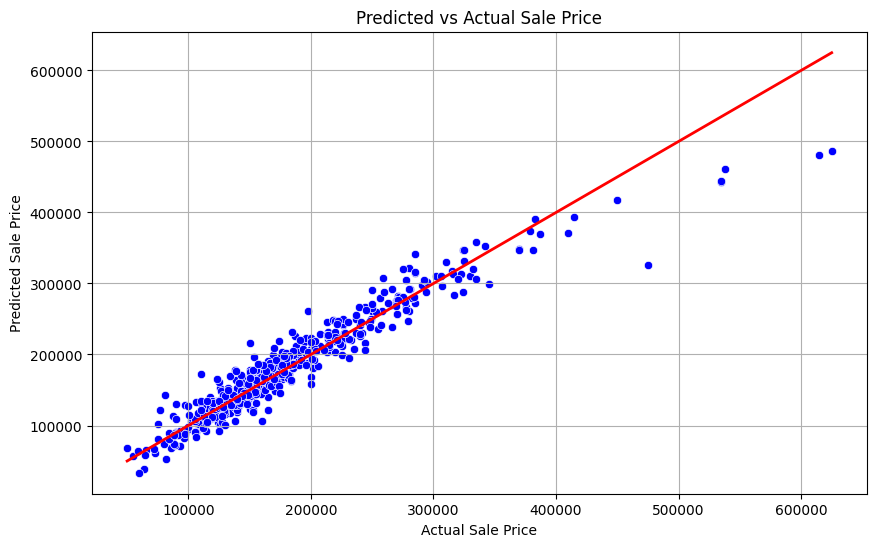

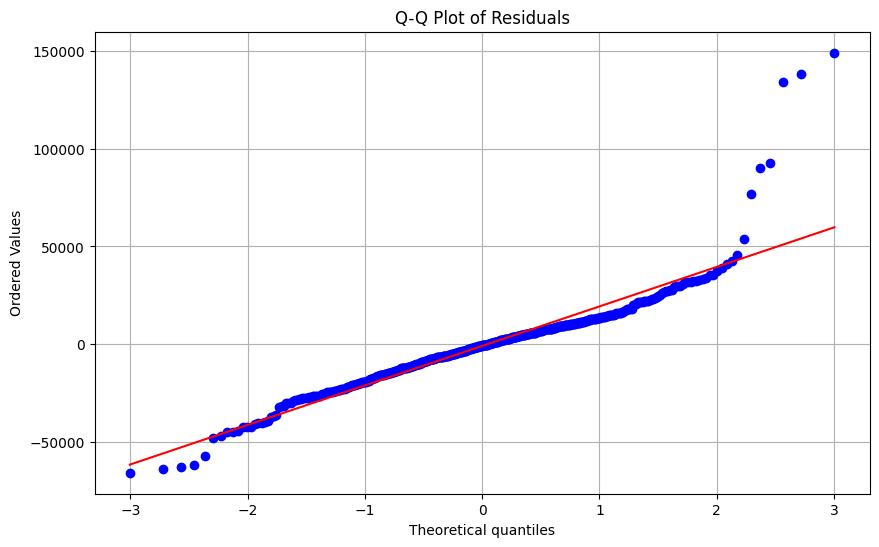

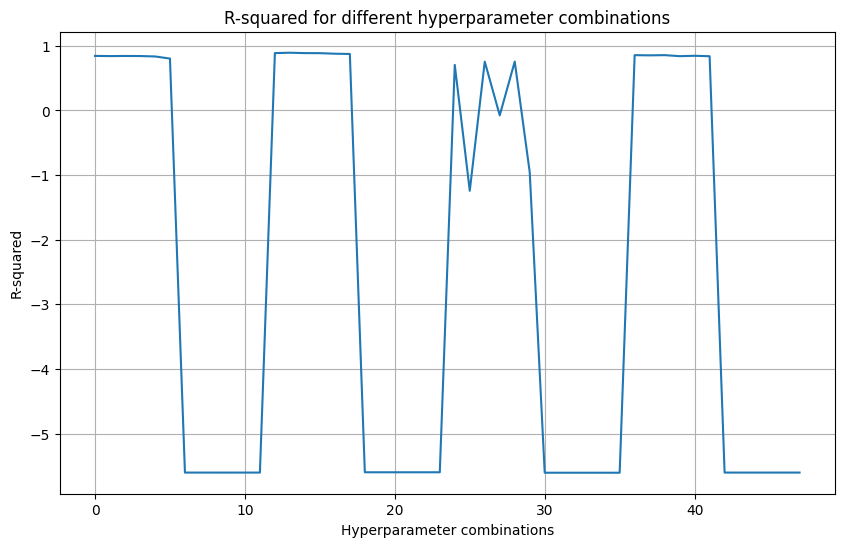

[CV] END batch_size=32, epochs=50, model__activation=relu, model__dropout_rate=0.2, model__optimizer=adam; total time=  53.1s
[CV] END batch_size=32, epochs=50, model__activation=relu, model__dropout_rate=0.5, model__optimizer=rmsprop; total time=  35.9s
[CV] END batch_size=32, epochs=50, model__activation=tanh, model__dropout_rate=0.2, model__optimizer=adam; total time=  48.1s
[CV] END batch_size=32, epochs=50, model__activation=tanh, model__dropout_rate=0.5, model__optimizer=rmsprop; total time=  37.1s
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.2, model__optimizer=adam; total time= 1.6min
[CV] END batch_size=32, epochs=100, model__activation=tanh, model__dropout_rate=0.0, model__optimizer=adam; total time= 1.6min
[CV] END batch_size=32, epochs=100, model__activation=tanh, model__dropout_rate=0.5, model__optimizer=adam; total time= 1.7min
[CV] END batch_size=64, epochs=50, model__activation=relu, model__dropout_rate=0.2, model__optimizer=adam; to

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import the functions from the module
from data_processing_module import load_data, preprocess_data, split_data

# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Remove columns with all missing values from the preprocessed data
X_preprocessed = X_preprocessed[:, ~np.all(np.isnan(X_preprocessed), axis=0)]

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Function to create the neural network model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

# Create the KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'model__dropout_rate': [0.0, 0.2, 0.5],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Mean Squared Error: {mse}')
print(f'Model R-squared: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Predicted vs Actual Sale Price')
plt.grid(True)
plt.show()

# Q-Q Plot for the model
plt.figure(figsize=(10, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# Plotting R-squared for different hyperparameter combinations
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x=results.index, y='mean_test_score')
plt.xlabel('Hyperparameter combinations')
plt.ylabel('R-squared')
plt.title('R-squared for different hyperparameter combinations')
plt.grid(True)
plt.show()


# The following code Hyperparameter tunes tensorflow get the highest R^2 score, for some reason the code does not run without redefining the function

In [13]:
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

# Create the KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__optimizer': [ 'rmsprop'],
    'model__activation': ['relu'],
    'model__dropout_rate': [0.0],
    'batch_size': [16,32],
    'epochs': [100, 200 ,500 ]
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Model Mean Squared Error: {mse}')
print(f'Model R-squared: {r2}')

Fitting 3 folds for each of 6 candidates, totalling 18 fits


2024-07-24 21:32:06.938681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:06.951635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:06.980446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:06.993362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:07.003975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:07.007638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-07-24 21:32:07.009324: I tensorflow/core/grappler/optimizers/cust

[CV] END batch_size=16, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   1.6s
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 1.0min
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 1.0min


/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
2024-07-24 21:34:25.703222: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-24 21:34:25.703247: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-24 21:34:25.703279: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-24 21:34:25.703308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 21:34:25.703321: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 

[CV] END batch_size=16, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   1.4s
[CV] END batch_size=32, epochs=500, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   0.3s
[CV] END batch_size=16, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 1.9min
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 1.0min


2024-07-24 21:35:19.115712: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-24 21:35:19.115760: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-24 21:35:19.115765: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-24 21:35:19.115794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-24 21:35:19.115815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-24 21:35:20.949718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


[CV] END batch_size=16, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   1.4s
[CV] END batch_size=32, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   0.4s
[CV] END batch_size=16, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 3.8min
[CV] END batch_size=32, epochs=500, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time= 3.0min
[CV] END batch_size=16, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   0.9s
[CV] END batch_size=32, epochs=100, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   0.4s
[CV] END batch_size=32, epochs=200, model__activation=relu, model__dropout_rate=0.0, model__optimizer=rmsprop; total time=   0.6s
[CV] END batch_size=16, epochs=200, model__activation=relu, model__dropout_rate=0.0, model